## IMPORTING ALL REQUIRED PACKAGES

In [1]:
# Core data handling
import pandas as pd
import numpy as np
import streamlit as st


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Utilities
import re
from ipywidgets import interact

# Set visualization style
pd.set_option('display.float_format', '{:.2f}'.format)

ModuleNotFoundError: No module named 'matplotlib'

## IMPORTING AND CLEANING DATASET BY LOOPING METHOD

In [2]:
!npm install -g localtunnel
!pip install streamlit pyngrok



changed 22 packages in 8s

3 packages are looking for funding
  run `npm fund` for details
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 217.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.9 kB 217.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.9 kB 163.4 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 216.4 kB/s eta 0:00:00
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
   

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.8 requires matplotlib, which is not installed.
catboost 1.2.8 requires scipy, which is not installed.
contextily 1.6.2 requires joblib, which is not installed.
contextily 1.6.2 requires matplotlib, which is not installed.
contextily 1.6.2 requires xyzservices, which is not installed.
folium 0.19.5 requires xyzservices, which is not installed.
keras 3.10.0 requires h5py, which is not installed.
keras 3.10.0 requires rich, which is not installed.
lightgbm 4.6.0 requires scipy, which is not installed.
mlxtend 0.23.4 requires joblib>=0.13.2, which is not installed.
mlxtend 0.23.4 requires matplotlib>=3.0.0, which is not installed.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, which is not installed.
mlxtend 0.23.4 requires scipy>=1.2.1, which is not installed.
rasterio 1.4.3 requires pyparsing, which is no


   --------- ------------------------------ 2.9/12.7 MB 38.4 kB/s eta 0:04:16
   --------- ------------------------------ 2.9/12.7 MB 38.4 kB/s eta 0:04:16
   --------- ------------------------------ 2.9/12.7 MB 38.4 kB/s eta 0:04:16
   --------- ------------------------------ 2.9/12.7 MB 38.4 kB/s eta 0:04:16
   --------- ------------------------------ 2.9/12.7 MB 38.4 kB/s eta 0:04:16
   --------- ------------------------------ 2.9/12.7 MB 38.4 kB/s eta 0:04:16
   --------- ------------------------------ 2.9/12.7 MB 39.9 kB/s eta 0:04:06
   --------- ------------------------------ 2.9/12.7 MB 39.9 kB/s eta 0:04:06
   --------- ------------------------------ 2.9/12.7 MB 39.9 kB/s eta 0:04:06
   --------- ------------------------------ 2.9/12.7 MB 39.9 kB/s eta 0:04:06
   --------- ------------------------------ 3.0/12.7 MB 40.4 kB/s eta 0:04:03
   --------- ------------------------------ 3.0/12.7 MB 40.4 kB/s eta 0:04:03
   --------- ------------------------------ 3.0/12.7 MB 40.4 kB

In [ ]:


def clean_column_name(name):
    """Clean individual column name"""
    # Remove 'v' and special characters, keep only alphanumeric and spaces
    name = re.sub(r'[^a-zA-Z0-9 ]', '', str(name))
    # Replace spaces with underscores and remove double underscores
    name = re.sub(r'\s+', '_', name.strip())
    return name

def clean_cpi_data(file_path):
    """Clean all sheets with proper date, weights and column names"""
    sheets = pd.read_excel("C:\\Users\\Jonas Benoit\\Desktop\\TIME_DATA.xlsx", sheet_name=None)
    cleaned_sheets = {}
    
    for sheet_name, df in sheets.items():
        # Clean all column names
        clean_cols = [clean_column_name(col) for col in df.columns]
        
        # First column is always Date
        clean_cols[0] = 'Date'
        
        # Extract weights (row 1) and clean data (rows 2+)
        weights = df.iloc[1].values
        clean_df = df.iloc[2:].copy()
        clean_df.columns = clean_cols
        
        # Convert Date column
        clean_df['Date'] = pd.to_datetime(clean_df['Date'])
        
        # Add weights as metadata (two options):
        
        clean_df.attrs['weights'] = dict(zip(clean_cols, weights))
        
        cleaned_sheets[sheet_name] = clean_df
    
    return cleaned_sheets

# Process the file
cleaned_data = clean_cpi_data('TIME_DATA.xlsx')

# Access cleaned data
urban_df = cleaned_data['Urban']
rural_df = cleaned_data['Rural']

#verification of result to see if change has made
print("Urban columns:", urban_df.columns.tolist())
print("First Urban weights:", urban_df.attrs['weights'])
print("\nRural columns:", rural_df.columns.tolist())
print("First Rural weights:", rural_df.attrs['weights'])

# Save cleaned data
with pd.ExcelWriter('CLEANED_CPI_DATA.xlsx') as writer:
    for sheet_name, df in cleaned_data.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)
        # To include weights in Excel, use this instead:
        # weights_row = pd.DataFrame([df.attrs['weights']])
        # pd.concat([weights_row, df]).to_excel(writer, sheet_name=sheet_name, index=False)

NameError: name 'pd' is not defined

## TO PRINT OUT THE TABLE TO SEE HOW IT'S LOOKS LIKE

In [13]:

urban_df.head() 

,Date,GENERAL_INDEX_CPI,Food_and_nonalcoholic_beverages,v_Bread_and_cereals,v_Meat,vMilk_cheese_and_eggs,v_Vegetables,v_Nonalcoholic_beverages,Alcoholic_beverages_and_tobacco,Clothing_and_footwear,Housing_water_electricity_gas_and_other_fuels,Furnishing_household_equipment_and_routine_household_maintenance,Health,Transport,Communication,Recreation_and_culture,Education,Restaurants_and_hotels,Miscellaneous_goods_and_services
2,2009-03-01,82.07,78.06,86.97,85.44,62.61,75.54,83.16,79.37,84.57,90.21,93.40,87.78,78.07,110.01,96.35,53.19,85.66,87.18
3,2009-04-01,81.93,77.67,84.66,86.03,62.21,75.86,82.48,79.10,84.68,90.44,93.44,88.05,77.61,110.70,98.14,53.19,85.03,87.23
4,2009-05-01,81.21,76.07,83.91,85.86,62.86,73.00,82.36,79.40,84.03,90.54,93.41,87.16,77.28,107.15,98.29,53.19,85.17,87.11
5,2009-06-01,80.84,75.10,83.45,82.34,62.68,71.99,82.58,79.28,82.82,90.46,93.08,87.11,77.56,107.77,96.64,53.19,85.68,87.80
6,2009-07-01,81.74,75.66,84.04,82.97,61.81,73.82,81.84,79.26,83.76,90.02,93.19,87.78,83.50,110.30,95.52,53.19,85.61,86.89


In [ ]:
rural_df.head()

,Date,GENERAL_INDEX_CPI,Food_and_nonalcoholic_beverages,v_Bread_and_cereals,v_Meat,vMilk_cheese_and_eggs,v_Vegetables,v_Nonalcoholic_beverages,Alcoholic_beverages_and_tobacco,Clothing_and_footwear,Housing_water_electricity_gas_and_other_fuels,Furnishing_household_equipment_and_routine_household_maintenance,Health,Transport,Communication,Recreation_and_culture,Education,Restaurants_and_hotels,Miscellaneous_goods_and_services
2,2009-03-01,81.77,77.86,92.05,85.11,69.60,72.57,95.63,91.95,82.53,93.90,93.81,84.78,90.13,113.34,94.02,75.06,82.32,88.97
3,2009-04-01,81.43,77.46,92.65,87.08,65.84,73.15,93.88,91.77,81.66,94.05,93.59,84.20,88.47,112.22,98.64,75.07,82.32,88.11
4,2009-05-01,82.16,78.79,94.33,86.57,65.73,73.14,93.06,86.90,81.35,93.74,94.15,85.14,88.04,112.04,98.39,75.08,82.41,90.20
5,2009-06-01,79.41,75.01,92.63,86.35,65.58,68.89,90.46,86.59,80.68,92.25,95.85,85.13,87.76,111.77,97.71,75.06,82.37,89.98
6,2009-07-01,82.63,79.48,88.96,84.45,66.02,77.37,90.27,85.88,81.32,93.72,95.55,86.83,89.41,108.67,98.39,75.08,82.32,87.97


In [14]:
urban_df['Alcoholic_beverages_and_tobacco']

2      79.37
3      79.10
4      79.40
5      79.28
6      79.26
       ...  
191   232.45
192   234.65
193   234.64
194   236.09
195   238.55
Name: Alcoholic_beverages_and_tobacco, Length: 194, dtype: float64

## LOOKING FOR INSIGHT ANS PATTERNS THROUGH VISUAL WAY

# 1.Plot overall inflation trends in urban and rural area respectively

In [15]:
# Plot overall inflation trends


plt.figure(figsize=(12,6))
urban_df.plot(x='Date', y='GENERAL_INDEX_CPI', label='Urban CPI')
rural_df.plot(x='Date', y='GENERAL_INDEX_CPI', label='Rural CPI')
plt.ylabel('Index Value')
plt.grid(True)
plt.show()

C:\Users\Jonas Benoit\AppData\Local\Temp\ipykernel_20192\3750968233.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


# 2.weight contribution of each component in urban 

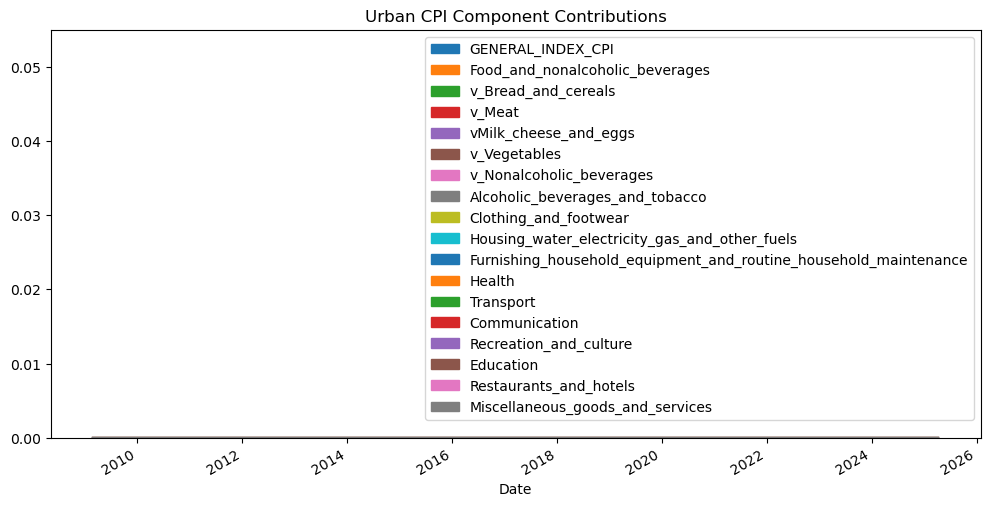

In [ ]:
# Calculate weighted contribution of each component

def calculate_contributions(df):
    weights = df.attrs['weights']
    base_value = df.iloc[0,1]  # First period's general index
    contributions = {}
    
    for col in df.columns[1:]:
        change = (df[col] - df[col].iloc[0])/df[col].iloc[0]
        contributions[col] = change * weights[col]/weights['GENERAL_INDEX_CPI']
    
    return pd.DataFrame(contributions, index=df['Date'])

urban_contrib = calculate_contributions(urban_df)
urban_contrib.plot.area(figsize=(12,6), title='Urban CPI Component Contributions')
plt.show()

# 3.Inflation rates

In [16]:
# Calculate monthly and annual inflation rates
def calculate_inflation(df, col='GENERAL_INDEX_CPI'):
    df['Monthly_Change'] = df[col].pct_change() * 100
    df['Annual_Change'] = df[col].pct_change(12) * 100
    return df

urban_df = calculate_inflation(urban_df)
rural_df = calculate_inflation(rural_df)

# Plot inflation rates
urban_df.plot(x='Date', y=['Monthly_Change','Annual_Change'], 
             figsize=(12,6), title='Urban Inflation Rates')
plt.show()

C:\Users\Jonas Benoit\AppData\Local\Temp\ipykernel_20192\2685052340.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


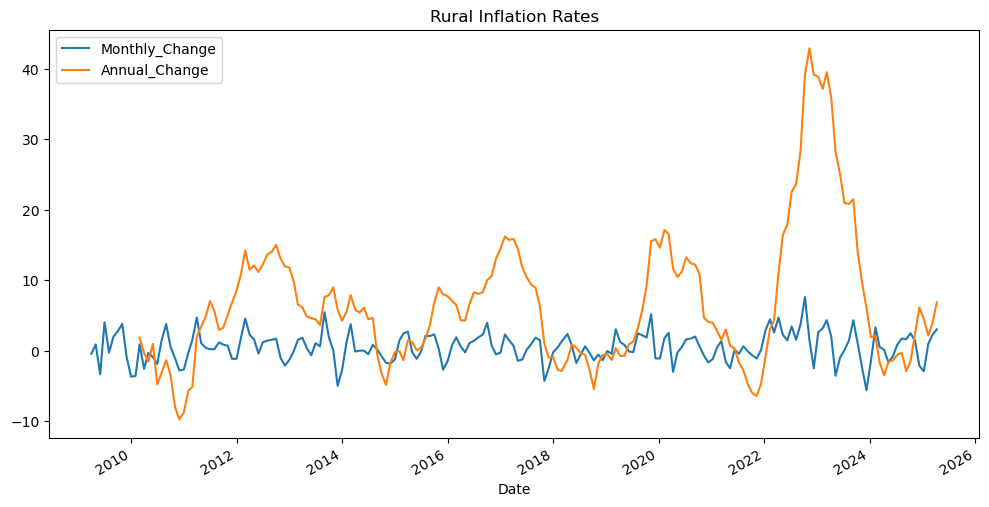

In [ ]:
# Calculate monthly and annual inflation rates
def calculate_inflation(df, col='GENERAL_INDEX_CPI'):
    df['Monthly_Change'] = df[col].pct_change() * 100
    df['Annual_Change'] = df[col].pct_change(12) * 100
    return df

rural_df = calculate_inflation(rural_df)
rural_df = calculate_inflation(rural_df)

# Plot inflation rates
rural_df.plot(x='Date', y=['Monthly_Change','Annual_Change'], 
             figsize=(12,6), title='Rural Inflation Rates')
plt.show()

# 4.Compare Urban and Rural inflation

In [17]:
# Compare urban and rural inflation
comparison = pd.DataFrame({
    'Urban': urban_df.set_index('Date')['GENERAL_INDEX_CPI'],
    'Rural': rural_df.set_index('Date')['GENERAL_INDEX_CPI']
})

comparison['Gap'] = comparison['Urban'] - comparison['Rural']
comparison.plot(figsize=(12,6), secondary_y=['Gap'],
              title='Urban-Rural CPI Comparison')
plt.show()

C:\Users\Jonas Benoit\AppData\Local\Temp\ipykernel_20192\1508596892.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


# 5.Food vs Core Inflation

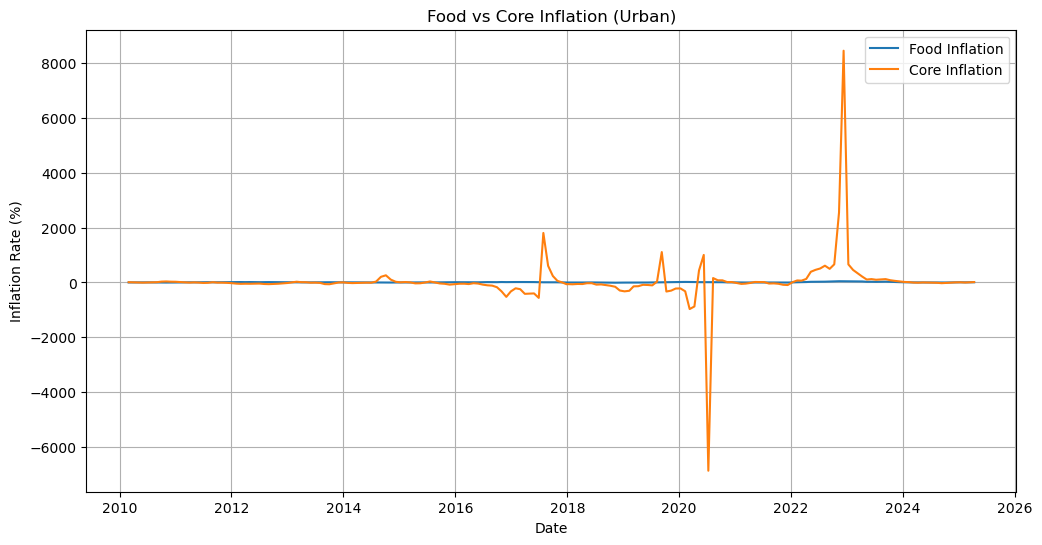

In [ ]:

food_col = 'Food_and_nonalcoholic_beverages'  # or whatever the exact name is

# Calculate food inflation (12-month change)
urban_df['Food_Inflation'] = urban_df[food_col].pct_change(12) * 100

# Calculate core inflation (excluding food)
weights = urban_df.attrs['weights']
food_weight = weights[food_col]
total_weight = weights['GENERAL_INDEX_CPI']

urban_df['Core_Index'] = ((urban_df['GENERAL_INDEX_CPI'] * total_weight - 
                         urban_df[food_col] * food_weight) / 
                         (total_weight - food_weight))

urban_df['Core_Inflation'] = urban_df['Core_Index'].pct_change(12) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(urban_df['Date'], urban_df['Food_Inflation'], label='Food Inflation')
plt.plot(urban_df['Date'], urban_df['Core_Inflation'], label='Core Inflation')
plt.title('Food vs Core Inflation (Urban)')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
urban_df.columns

Index(['Date', 'GENERAL_INDEX_CPI', 'Food_and_nonalcoholic_beverages',
       'v_Bread_and_cereals', 'v_Meat', 'vMilk_cheese_and_eggs',
       'v_Vegetables', 'v_Nonalcoholic_beverages',
       'Alcoholic_beverages_and_tobacco', 'Clothing_and_footwear',
       'Housing_water_electricity_gas_and_other_fuels',
       'Furnishing_household_equipment_and_routine_household_maintenance',
       'Health', 'Transport', 'Communication', 'Recreation_and_culture',
       'Education', 'Restaurants_and_hotels',
       'Miscellaneous_goods_and_services', 'Monthly_Change', 'Annual_Change'],
      dtype='object')

# 6.seasonal patterns

In [19]:
# Decompose time series to see seasonal patterns
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(urban_df.set_index('Date')['GENERAL_INDEX_CPI'], 
                          model='multiplicative', period=12)
result.plot()
plt.show()

C:\Users\Jonas Benoit\AppData\Local\Temp\ipykernel_20192\2686955144.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


# 6. components to move together

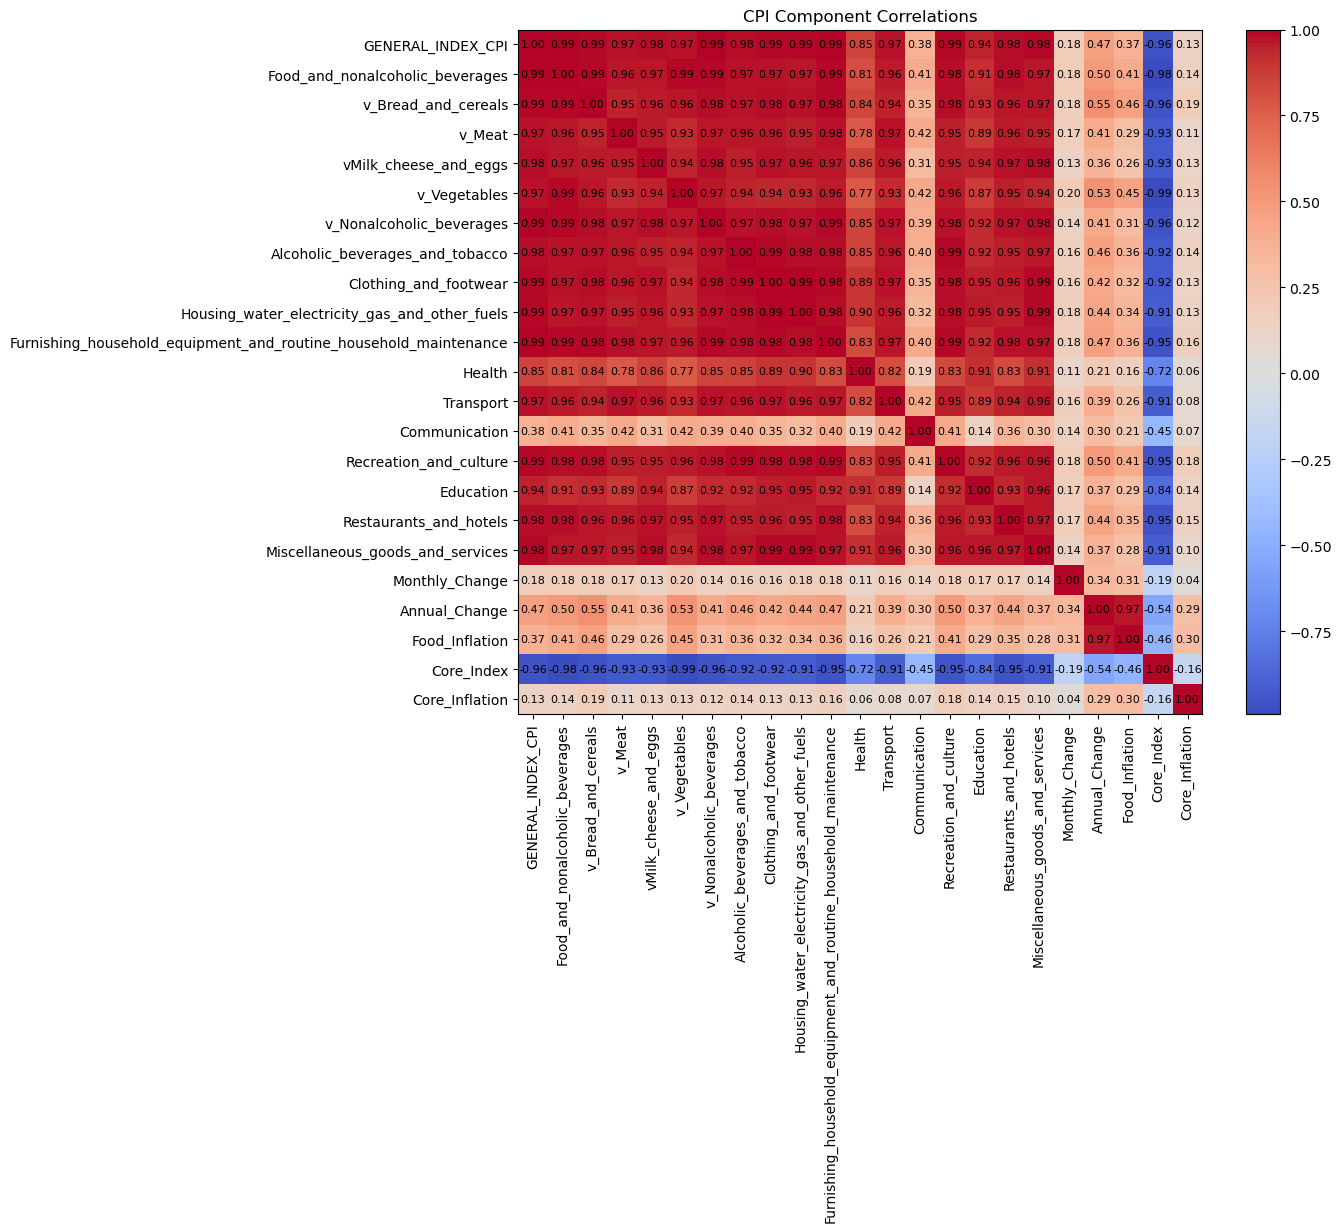

In [ ]:
# Compute correlation matrix
corr_matrix = urban_df[urban_df.columns[1:]].corr()

# Create the figure
plt.figure(figsize=(14, 12))
im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Add labels
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('CPI Component Correlations')

# Add the correlation values inside the heatmap
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        value = corr_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

# 7. Signification  changes in trends

In [20]:
# Identify significant changes in trends
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

model = MarkovRegression(urban_df['GENERAL_INDEX_CPI'].pct_change().dropna()*100, 
                        k_regimes=2, trend='c')
results = model.fit()
print(results.summary())

                        Markov Switching Model Results                        
Dep. Variable:      GENERAL_INDEX_CPI   No. Observations:                  193
Model:               MarkovRegression   Log Likelihood                -250.235
Date:                Thu, 03 Jul 2025   AIC                            510.470
Time:                        20:08:20   BIC                            526.784
Sample:                             0   HQIC                           517.077
                                - 193                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0864        nan        nan        nan         nan         nan
                             Regime 1 parameters    

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 8.rolling standard deviation

In [21]:
# Calculate rolling standard deviation
urban_df['Rolling_Volatility'] = urban_df['GENERAL_INDEX_CPI'].pct_change().rolling(12).std()*100
urban_df.plot(x='Date', y='Rolling_Volatility',
             figsize=(12,6), title='12-Month Inflation Volatility')
plt.show()

C:\Users\Jonas Benoit\AppData\Local\Temp\ipykernel_20192\868248540.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


# 9. Forecasting

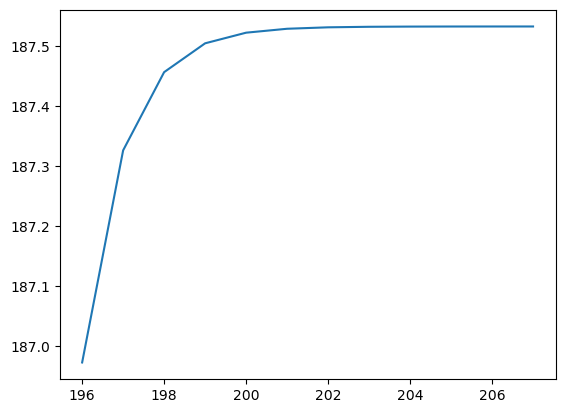

In [ ]:
# Simple ARIMA forecasting
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(urban_df['GENERAL_INDEX_CPI'], order=(1,1,1))
results = model.fit()
forecast = results.get_forecast(steps=12)
forecast.predicted_mean.plot()
plt.show()

# 10. INTRACTIVE DASHBORDS

In [ ]:
# Create interactive dashboard
import plotly.express as px
from ipywidgets import interact

@interact
def plot_component(component=urban_df.columns[1:]):
    fig = px.line(urban_df, x='Date', y=component,
                 title=f'Urban {component} Over Time')
    fig.show()

: 

In [ ]:
# Create interactive dashboard

import plotly.express as px
from ipywidgets import interact

@interact
def plot_component(component=urban_df.columns[1:]):
    fig = px.line(rural_df, x='Date', y=component,
                 title=f'Rural {component} Over Time')
    fig.show()


interactive(children=(Dropdown(description='component', options=('GENERAL_INDEX_CPI', 'Food_and_nonalcoholic_b…